In [1]:
%matplotlib qt
# %matplotlib
%load_ext autoreload
%autoreload 2
from imports import *
repertory_memoire="/Users/margauxvandererven/Library/CloudStorage/OneDrive-UniversitéLibredeBruxelles/memoire/"

Dispersion is linear
Dispersion is linear
Dispersion is linear
Dispersion is linear


In [17]:
# File generated by CMD 3.8 (http://stev.oapd.inaf.it/cmd) on Mon Nov 25 13:35:08 UTC 2024
# isochrones based on PARSEC release v1.2S +  COLIBRI S_37 + S_35 + PR16
# Basic references: Bressan et al. (2012), MNRAS, 427, 127 + Chen et al. (2014, 2015), MNRAS, 444, 2525 + MNRAS, 452, 1068 + Tang et al. (2014), MNRAS, 445, 4287 + Marigo et al. (2017), ApJ, 835, 77 + Pastorelli al. (2019), MNRAS, 485, 5666 + Pastorelli al. (2020), MNRAS, in press
# Thermal pulse cycles included 
# On RGB, assumed Reimers mass loss with efficiency eta=0.2
# LPV periods and growth rates added cf. Trabucchi et al. (2019)
# but fundamental-mode LPV periods are from Trabucchi et al. (2021)
# Photometric system: <i>UBVRIJHK</i> (cf. Maiz-Apellaniz 2006 + Bessell 1990)
# Using YBC version of bolometric corrections as in Chen et al. (2019)
# O-rich circumstellar dpmod60alox40 dust from Groenewegen (2006)
# C-rich circumstellar AMCSIC15 dust from Groenewegen (2006)
# IMF: Kroupa (2001, 2002) + Kroupa et al. (2013) canonical two-part-power law IMF corrected for unresolved binaries 
# Kind of output: isochrone tables

size_plolice=18

with open("../extra/iso.txt","r",encoding="utf8") as file :
        lines = file.readlines()

# print(lines[16].split)
logg = []
logTeff = []

for i in lines[14:-1]:
        logg.append(float(i.split()[8]))
        logTeff.append(float(i.split()[7]))


# print(logg[0], logg[-1], logTeff[0], logTeff[-1])

f = plt.figure(figsize=(8, 8))
gs = f.add_gridspec(1)
ax = gs.subplots(sharex=False, sharey=True)

ax.plot(logTeff[:-3], logg[:-3], color='indianred', linewidth=1.8)
# ax.scatter(logTeff, logg, color='indianred')
ax.vlines(np.log10(4000),-2,5,linewidth=1.8,linestyles="--", color='gray', label="T$_{\mathrm{eff}}$ = 4000 K")
ax.vlines(np.log10(4307),-2,5,linewidth=1.8,linestyles="dotted", color='gray', label="T$_{\mathrm{eff}}$ = 4307 K")
ax.set_xlabel("log T$_{\mathrm{eff}}$", fontsize=size_plolice)
ax.set_ylabel("log g", fontsize=size_plolice)
ax.tick_params(axis = 'both', labelsize = 10)
ax.xaxis.set_tick_params(direction = 'in', length = 5, which = 'major', top=True, bottom=True)
ax.xaxis.set_tick_params(direction = 'in', length = 2, which = 'minor', top=True, bottom=True)
ax.yaxis.set_tick_params(direction = 'in', length = 5, which = 'major',top=True, bottom=True)
ax.yaxis.set_tick_params(direction = 'in', length = 2, which = 'minor',top=True, bottom=True)

ax.xaxis.set_major_locator(MultipleLocator(0.1))
ax.xaxis.set_minor_locator(MultipleLocator(0.05))
ax.yaxis.set_major_locator(MultipleLocator(1))
ax.yaxis.set_minor_locator(MultipleLocator(0.5))
ax.tick_params(axis = 'both', labelsize = size_plolice)

ax.invert_xaxis()
ax.invert_yaxis()

intersections = [(teff, g) for teff, g in zip(logTeff, logg) if np.isclose(teff, np.log10(4000), atol=0.001)]
for teff, g in intersections:
    print(f"Intersection à logTeff = {teff}, logg = {g}")
plt.legend(fontsize=size_plolice)
plt.savefig("../présentation/images/isochrones.pdf", bbox_inches='tight', dpi=400, transparent=True)
plt.show()

Intersection à logTeff = 3.6017, logg = 1.041


<>:37: SyntaxWarning: invalid escape sequence '\m'
<>:38: SyntaxWarning: invalid escape sequence '\m'
<>:39: SyntaxWarning: invalid escape sequence '\m'
<>:37: SyntaxWarning: invalid escape sequence '\m'
<>:38: SyntaxWarning: invalid escape sequence '\m'
<>:39: SyntaxWarning: invalid escape sequence '\m'
/var/folders/cr/jh08cm417bq6mz5b3j4kvmxm0000gn/T/ipykernel_33896/3600635879.py:37: SyntaxWarning: invalid escape sequence '\m'
  ax.vlines(np.log10(4000),-2,5,linewidth=1.8,linestyles="--", color='gray', label="T$_{\mathrm{eff}}$ = 4000 K")
/var/folders/cr/jh08cm417bq6mz5b3j4kvmxm0000gn/T/ipykernel_33896/3600635879.py:38: SyntaxWarning: invalid escape sequence '\m'
  ax.vlines(np.log10(4307),-2,5,linewidth=1.8,linestyles="dotted", color='gray', label="T$_{\mathrm{eff}}$ = 4307 K")
/var/folders/cr/jh08cm417bq6mz5b3j4kvmxm0000gn/T/ipykernel_33896/3600635879.py:39: SyntaxWarning: invalid escape sequence '\m'
  ax.set_xlabel("log T$_{\mathrm{eff}}$", fontsize=size_plolice)


In [36]:
from sympy import symbols, Eq, solve
with open("../ROT_0.00_Z0.008_Y0.263/Z0.008Y0.263_ROT0.00_M2.0.TAB","r",encoding="utf8") as file :
        lines = file.readlines()

# Constantes physiques
G = 6.674e-8  # Constante gravitationnelle en cm³ g⁻¹ s⁻²
M_sun = 1.989e33  # Masse du Soleil en grammes
R_sun = 6.955e10  # Rayon du Soleil en cm


# print(lines[16].split)
logL = []
logTeff = []
Mass=[]
Radius=[]

for i in lines[5:-1]:
        logL.append(float(i.split()[3]))
        logTeff.append(float(i.split()[4]))
        Mass.append(float(i.split()[0]))
        Radius.append(float(i.split()[5]))

# print(logL[0], logL[-1], logTeff[0], logTeff[-1])
logG=np.log10(6.674*1e-8)
logM_soleil=np.log10(1.989*1e33)
logR_soleil=np.log10(6.957*1e10)
logg=[]
for i in range(len(logL)):
        logg_ = logG+2*logM_soleil +np.log10(Mass[i])-2*np.log10(Radius[i]) -2*logR_soleil
        logg.append(logg_)

f = plt.figure(figsize=(8, 8))
gs = f.add_gridspec(1)
ax = gs.subplots(sharex=False, sharey=True)

ax.plot(logTeff, logg, color='indianred')
# ax.vlines(np.log10(4000),-2,5,linewidth=1,linestyles="dotted", color='gray' )

ax.set_xlabel("log T$_{eff}$", fontsize=14)
ax.set_ylabel("log g", fontsize=14)
ax.tick_params(axis = 'both', labelsize = 10)
ax.xaxis.set_tick_params(direction = 'in', length = 5, which = 'major', top=True, bottom=True)
ax.xaxis.set_tick_params(direction = 'in', length = 2, which = 'minor', top=True, bottom=True)
ax.yaxis.set_tick_params(direction = 'in', length = 5, which = 'major',top=True, bottom=True)
ax.yaxis.set_tick_params(direction = 'in', length = 2, which = 'minor',top=True, bottom=True)

ax.invert_xaxis()
ax.invert_yaxis()
plt.show()

In [44]:
import numpy as n
# Déterminer le début des données numériques (en ignorant les éventuelles lignes d'en-tête)
data_start = 0
for i, line in enumerate(lines):
    if line.strip() and line[0].isdigit():  # Vérifie si la ligne commence par un chiffre
        data_start = i
        break

# Charger les données
data = np.loadtxt("../ROT_0.00_Z0.008_Y0.263/Z0.008Y0.263_ROT0.00_M2.0.TAB", skiprows=3)

# Supposons que les colonnes utiles soient :
# Colonne 1 : Masse (en M_sun)
# Colonne 2 : Rayon (en R_sun)

masses = data[:, 0] * M_sun  # Conversion en grammes
rayons = data[:, 5] * R_sun  # Conversion en cm

# Calcul de log g
g = G * masses / (rayons ** 2)
log_g = np.log10(g)

# Sauvegarde des résultats
np.savetxt("log_g_results.txt", log_g, header="log g values", fmt="%.6f")

print("Calcul terminé. Résultats enregistrés dans log_g_results.txt")

Calcul terminé. Résultats enregistrés dans log_g_results.txt


In [26]:
#Z/1-Z-0.2485-1.78Z
frac=10**(-0.3 + np.log10(0.0207))

In [28]:
alpha=0.7515
beta=-2.78
print((frac*alpha)/(1-frac*beta))

0.0075779359848490435


In [2]:
raies_profondes={"Ca I": [19452.9,19505.8, 19776.7, 19853.02, 19862.1, 19917.08],
           "Mg I": [14877.648,15024.992, 15040.246, 15748.988, 15765.7945,17108.631],
           "Al I": [16750]}

<>:13: SyntaxWarning: invalid escape sequence '\e'
<>:14: SyntaxWarning: invalid escape sequence '\e'
<>:15: SyntaxWarning: invalid escape sequence '\e'
<>:13: SyntaxWarning: invalid escape sequence '\e'
<>:14: SyntaxWarning: invalid escape sequence '\e'
<>:15: SyntaxWarning: invalid escape sequence '\e'
/var/folders/cr/jh08cm417bq6mz5b3j4kvmxm0000gn/T/ipykernel_95538/76815736.py:13: SyntaxWarning: invalid escape sequence '\e'
  "logg/s4000_g+0.0_m2.0_t02_st_z-0.25_a+0.10_c+0.00_n+0.00_o+0.10_r+0.00_s+0.00.mod_14850-17125_Mgabu_8_logg_0.conv":"log$\epsilon$=8, logg=0",
/var/folders/cr/jh08cm417bq6mz5b3j4kvmxm0000gn/T/ipykernel_95538/76815736.py:14: SyntaxWarning: invalid escape sequence '\e'
  "logg/s4000_g+1.0_m2.0_t02_st_z-0.25_a+0.10_c+0.00_n+0.00_o+0.10_r+0.00_s+0.00.mod_14850-17125_Mgabu_8_logg_1.conv":"log$\epsilon$=8, logg=1",
/var/folders/cr/jh08cm417bq6mz5b3j4kvmxm0000gn/T/ipykernel_95538/76815736.py:15: SyntaxWarning: invalid escape sequence '\e'
  "logg/s4000_g+2.0_m2.0_t02_

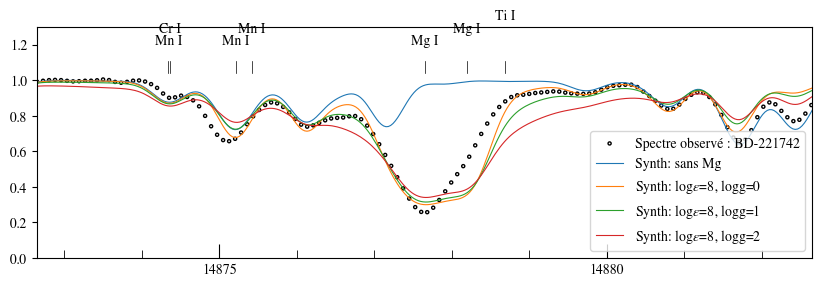

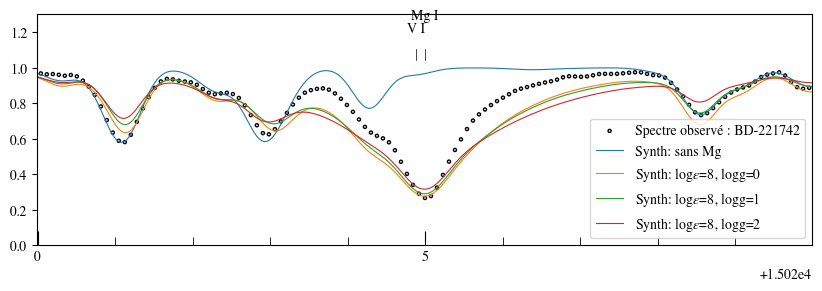

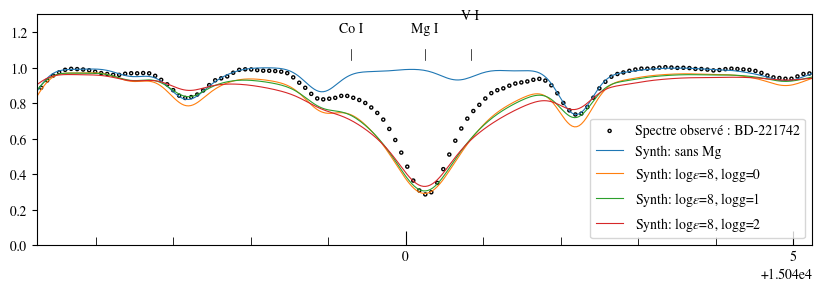

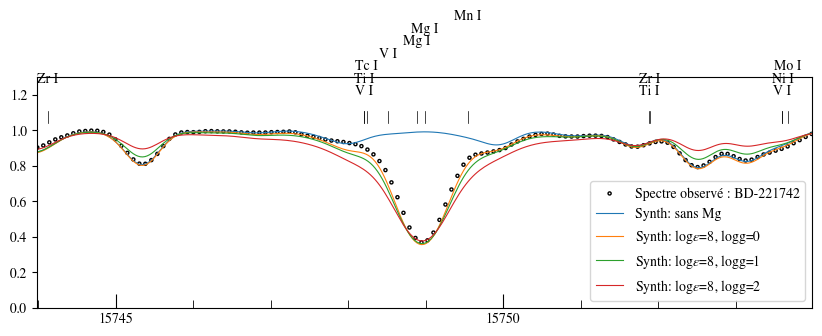

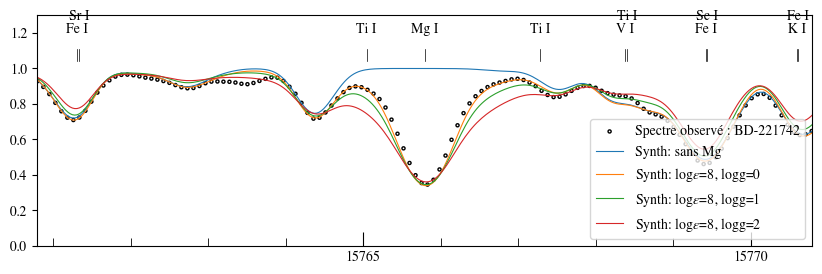

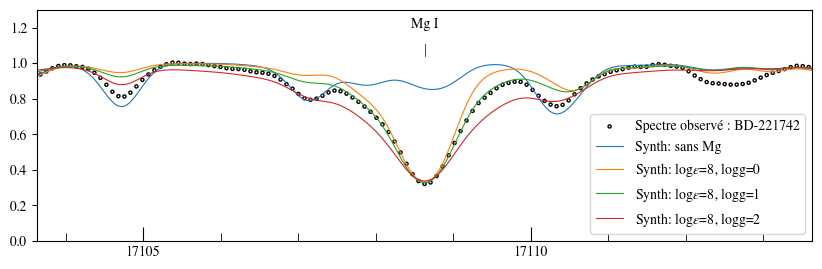

In [3]:
# raies_profondes = [14877.648,15024.992,15040.246, 15748.886,
#  15748.988,15765.7945, 15888.44, 19505.8, 16750, 17108.631, 
#  19917.08, 19862.1, 19853.02, 19776.7, 19452.9]

raies_profondes={"Ca I": [19452.9,19505.8, 19776.7, 19853.02, 19862.1, 19917.08],
           "Mg I": [14877.648,15024.992, 15040.246, 15748.988, 15765.7945,17108.631],
           "Al I": [16750]}
# print(raies_profondes)
for k in raies_profondes["Mg I"]:
    zoom_lines({i:[k]},path,
            {
                    "logg/4000g1.0z-0.50m1.0t02a+0.20c+0.346n+0.00o+0.20r+0.00s+0.00.mod_14850-17125_Mgabu_-20.conv":"sans Mg",
                    "logg/s4000_g+0.0_m2.0_t02_st_z-0.25_a+0.10_c+0.00_n+0.00_o+0.10_r+0.00_s+0.00.mod_14850-17125_Mgabu_8_logg_0.conv":"log$\epsilon$=8, logg=0",
                    "logg/s4000_g+1.0_m2.0_t02_st_z-0.25_a+0.10_c+0.00_n+0.00_o+0.10_r+0.00_s+0.00.mod_14850-17125_Mgabu_8_logg_1.conv":"log$\epsilon$=8, logg=1",
                    "logg/s4000_g+2.0_m2.0_t02_st_z-0.25_a+0.10_c+0.00_n+0.00_o+0.10_r+0.00_s+0.00.mod_14850-17125_Mgabu_8_logg_2.conv":"log$\epsilon$=8, logg=2",

                # "logg/s4000_g+2.0_m2.0_t02_st_z-0.25_a+0.10_c+0.00_n+0.00_o+0.10_r+0.00_s+0.00.mod_"+
                # str(float(i)-15)+"-"+str(float(i)+15)+"_BD-221742.conv":"log g=2",
                # "logg/s4000_g+1.0_m2.0_t02_st_z-0.25_a+0.10_c+0.00_n+0.00_o+0.10_r+0.00_s+0.00.mod_"+
                # str(float(i)-15)+"-"+str(float(i)+15)+"_BD-221742.conv":"log g=1",
                #     "logg/s4000_g+0.0_m2.0_t02_st_z-0.25_a+0.10_c+0.00_n+0.00_o+0.10_r+0.00_s+0.00.mod_"+
                # str(float(i)-15)+"-"+str(float(i)+15)+"_BD-221742.conv":"log g=0"
                }
            , stardata,5, lines_BD22)

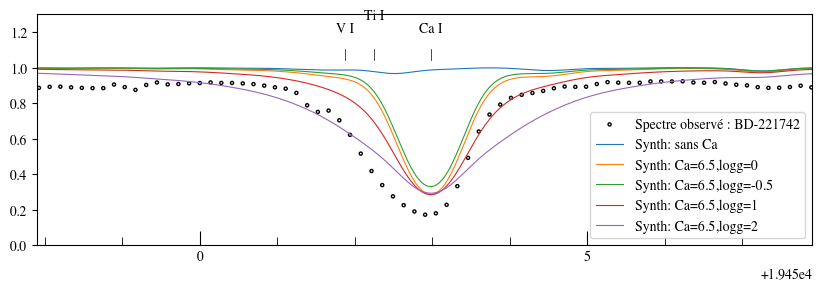

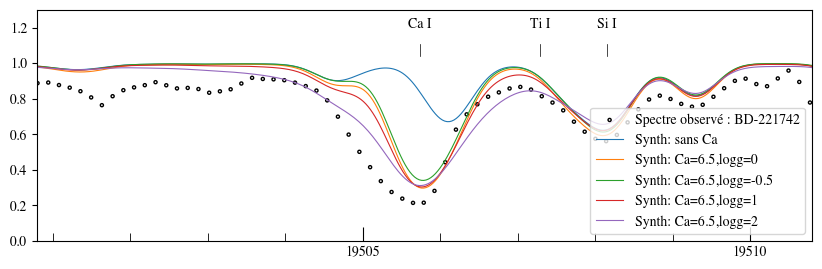

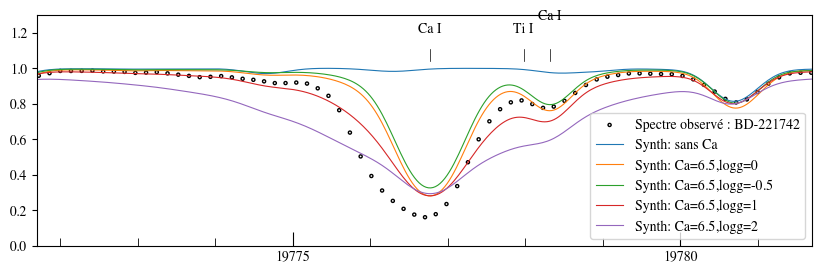

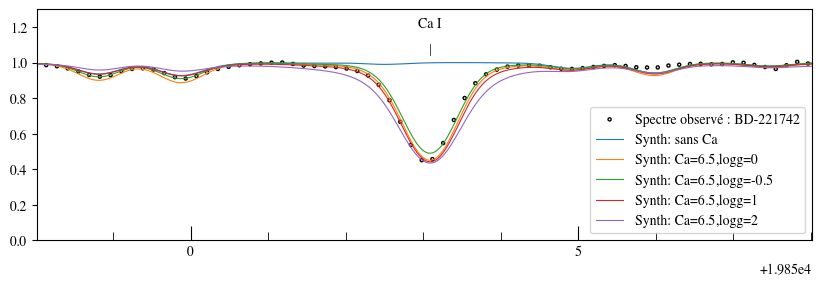

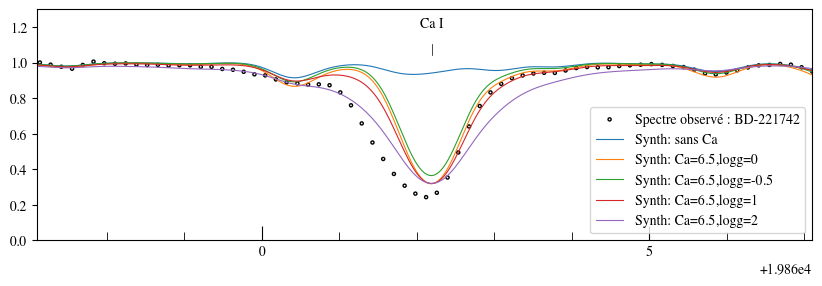

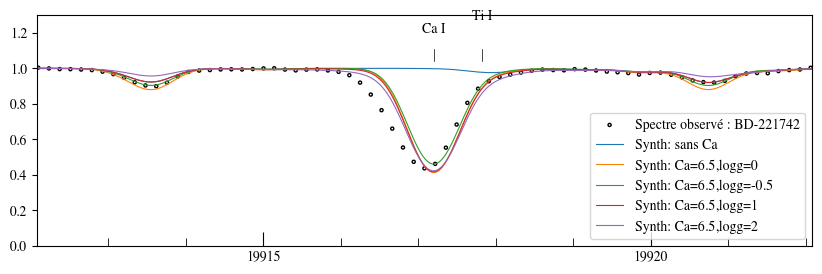

In [4]:
for k in raies_profondes["Ca I"]:
    zoom_lines({i:[k]},path,
            {
                "logg/s4000_g+1.0_m2.0_t02_st_z-0.25_a+0.10_c+0.00_n+0.00_o+0.10_r+0.00_s+0.00.mod_19425-19935_Caabu_-20_logg_1.conv":"sans Ca",
                # "logg/s4000_g+1.0_m2.0_t02_st_z-0.25_a+0.10_c+0.00_n+0.00_o+0.10_r+0.00_s+0.00.mod_19425-19935_Caabu_6_logg_1.conv":"Ca=6,logg=1",
                "logg/s4000_g+0.0_m2.0_t02_st_z-0.25_a+0.10_c+0.00_n+0.00_o+0.10_r+0.00_s+0.00.mod_19425-19935_Caabu_6.5_logg_0.0.conv":"Ca=6.5,logg=0",
                "logg/s4000_g-0.5_m1.0_t02_st_z+0.25_a+0.00_c+0.00_n+0.00_o+0.00_r+0.00_s+0.00.mod_19425-19935_Caabu_6.5_logg_-0.5.conv":"Ca=6.5,logg=-0.5",
                "logg/s4000_g+1.0_m2.0_t02_st_z-0.25_a+0.10_c+0.00_n+0.00_o+0.10_r+0.00_s+0.00.mod_19425-19935_Caabu_6.5_logg_1.conv":"Ca=6.5,logg=1",
                "logg/s4000_g+2.0_m2.0_t02_st_z-0.25_a+0.10_c+0.00_n+0.00_o+0.10_r+0.00_s+0.00.mod_19425-19935_Caabu_6.5_logg_2.0.conv":"Ca=6.5,logg=2",
                # "logg/s4000_g+1.0_m2.0_t02_st_z-0.25_a+0.10_c+0.00_n+0.00_o+0.10_r+0.00_s+0.00.mod_19425-19935_Caabu_7_logg_1.conv":"Ca=7,logg=1",
                # "logg/s4000_g+1.0_m2.0_t02_st_z-0.25_a+0.10_c+0.00_n+0.00_o+0.10_r+0.00_s+0.00.mod_19425-19935_Caabu_8_logg_1.conv":"Ca=8,logg=1"
                }
            , stardata,5, lines_BD22)

In [ ]:
synth={
     "logg/s4000_g+1.0_m2.0_t02_st_z-0.25_a+0.10_c+0.00_n+0.00_o+0.10_r+0.00_s+0.00.mod_19425-19935_Caabu_-20_logg_1.conv2":"sans Ca",
                # "logg/s4000_g+1.0_m2.0_t02_st_z-0.25_a+0.10_c+0.00_n+0.00_o+0.10_r+0.00_s+0.00.mod_19425-19935_Caabu_6_logg_1.conv":"Ca=6,logg=1",
                "logg/s4000_g+0.0_m2.0_t02_st_z-0.25_a+0.10_c+0.00_n+0.00_o+0.10_r+0.00_s+0.00.mod_19425-19935_Caabu_6.5_logg_0.0.conv2":"Ca=6.5,logg=0",
                "logg/s4000_g-0.5_m1.0_t02_st_z+0.25_a+0.00_c+0.00_n+0.00_o+0.00_r+0.00_s+0.00.mod_19425-19935_Caabu_6.5_logg_-0.5.conv2":"Ca=6.5,logg=-0.5",
                "logg/s4000_g+1.0_m2.0_t02_st_z-0.25_a+0.10_c+0.00_n+0.00_o+0.10_r+0.00_s+0.00.mod_19425-19935_Caabu_6.5_logg_1.conv2":"Ca=6.5,logg=1",
                "logg/s4000_g+2.0_m2.0_t02_st_z-0.25_a+0.10_c+0.00_n+0.00_o+0.10_r+0.00_s+0.00.mod_19425-19935_Caabu_6.5_logg_2.0.conv2":"Ca=6.5,logg=2",
                # "logg/s4000_g+1.0_m2.0_t02_st_z-0.25_a+0.10_c+0.00_n+0.00_o+0.10_r+0.00_s+0.00.mod_19425-19935_Caabu_7_logg_1.conv":"Ca=7,logg=1",
                # "logg/s4000_g+1.0_m2.0_t02_st_z-0.25_a+0.10_c+0.00_n+0.00_o+0.10_r+0.00_s+0.00.mod_19425-19935_Caabu_8_logg_1.conv":"Ca=8,logg=1"
                }

chi_final={}
log_g={}

raies_profondes={"Ca I": [19452.9,19505.8, 19776.7, 19853.02, 19862.1, 19917.08],
           "Mg I": [14877.648,15024.992, 15040.246, 15748.988, 15765.7945,17108.631],
           "Al I": [16750]}
synth_bis = {key: synth[key] for key in list(synth.keys())[1:]}

logg=[0.0, -0.5, 1, 2.0]
raies_Ca={
     19853.02:[19853.35, 19854.66],
     # 19853.021:[19851.51,19852.77],
     # 19862.1:[19862.51, 19863.94],
          }
for wavelength in raies_Ca:
     # chi_plot_ABU(
     #           logg, 
     #           chi_2(path, synth_bis, stardata, wavelength, lines_BD22,chi_final,
     #            start=raies_Ca.get(wavelength)[0], end=raies_Ca.get(wavelength)[1])["chi_squared_values"], "log g",wavelength, "Ca I", log_g)
     # chi_2(path, synth, stardata, wavelength, lines_BD22,chi_final,
     #           start=raies_Ca.get(wavelength)[0], end=raies_Ca.get(wavelength)[1],
     #           plot=True, size_police=14)

     plot_zone_chi2(wavelength,path, synth_bis, stardata,lines_BD22,name="Mg I",
          start=raies_Ca.get(wavelength)[0], end=raies_Mg.get(wavelength)[1],
          size_police=24,
          #   save="test4", 
          
          )

NameError: name 'chi_plot_ABU' is not defined

In [12]:
raies_profondes={"Ca I": [19452.9,19505.8, 19776.7, 19853.02, 19862.1, 19917.08],
           "Mg I": [14877.648,15024.992, 15040.246, 15748.988, 15765.7945,17108.631],
           "Al I": [16750]}
synth={
   "logg/4000g1.0z-0.50m1.0t02a+0.20c+0.346n+0.00o+0.20r+0.00s+0.00.mod_14850-17125_Mgabu_-20.conv":"sans Mg",
                    "logg/s4000_g+0.0_m2.0_t02_st_z-0.25_a+0.10_c+0.00_n+0.00_o+0.10_r+0.00_s+0.00.mod_14850-17125_Mgabu_8_logg_0.conv":r"log $\mathit{g}$ = 0",
                    "logg/s4000_g+1.0_m2.0_t02_st_z-0.25_a+0.10_c+0.00_n+0.00_o+0.10_r+0.00_s+0.00.mod_14850-17125_Mgabu_8_logg_1.conv":r"log $\mathit{g}$ = 1",
                    "logg/s4000_g+2.0_m2.0_t02_st_z-0.25_a+0.10_c+0.00_n+0.00_o+0.10_r+0.00_s+0.00.mod_14850-17125_Mgabu_8_logg_2.conv":r"log $\mathit{g}$ = 2",}
chi_final={}
raie_CN_bis={}
synth_bis = {key: synth[key] for key in list(synth.keys())[1:]}
logg=[0, 1, 0.5]
raies_Mg={
    #  15748.988:[15749.24, 15750.48],
    #  15748.989:[15747.32, 15748.67],
    #  15765.7945:[15766.05, 15767.29],
    #  15765.7946:[15764.87, 15765.61],
    #  17108.6311:[17108.88, 17109.91],
     17108.631:[17107.44, 17108.28],
          }
for wavelength in raies_Mg:
    # chi_plot_ABU(
    #         logg, 
    #         chi_2(path, synth_bis, stardata, wavelength, {},chi_final,
    #             start=raies_Mg.get(wavelength)[0], end=raies_Mg.get(wavelength)[1])["chi_squared_values"], "log g",wavelength, "Mg I", log_g)
    plot_zone_chi2(wavelength,path, synth_bis, stardata,lines_BD22,name="Mg I",
            start=raies_Mg.get(wavelength)[0], end=raies_Mg.get(wavelength)[1],
            size_police=24,
              save="../présentation/images/test4.pdf", 
            
            )
    # chi_2(path, synth_bis, stardata, wavelength, {},chi_final,name="Mg I",
    #         start=raies_Mg.get(wavelength)[0], end=raies_Mg.get(wavelength)[1],
    #         plot=True, size_police=20,
            #   save="test4", 
    #         axes=(None,True)
    #         )

In [27]:
pprint(log_g)
log_g={15748.988: np.float64(0.18788553456436557),
 15748.989: np.float64(0.09985810908903735),
 15765.7945: np.float64(0.09747987767068216),
 15765.7946: np.float64(0.025406683135832168),
 17108.631: np.float64(0.7308512664143455),
 17108.6311: np.float64(0.9284085040933311),
 19853.02: np.float64(-0.16627312212382958),
 19853.021: np.float64(0.5131598143473451),
 19862.1: np.float64(0.395997101739072)}
print(log_g.values())
print(np.mean(list(log_g.values())))
print(np.std(list(log_g.values())))

{15748.988: np.float64(0.18788553456436557),
 15748.989: np.float64(0.09985810908903735),
 15765.7945: np.float64(0.09747987767068216),
 15765.7946: np.float64(0.025406683135832168),
 17108.631: np.float64(0.7308512664143455),
 17108.6311: np.float64(0.9284085040933311),
 19853.02: np.float64(-0.16627312212382958),
 19853.021: np.float64(0.5131598143473451),
 19862.1: np.float64(0.395997101739072)}
dict_values([np.float64(0.18788553456436557), np.float64(0.09985810908903735), np.float64(0.09747987767068216), np.float64(0.025406683135832168), np.float64(0.7308512664143455), np.float64(0.9284085040933311), np.float64(-0.16627312212382958), np.float64(0.5131598143473451), np.float64(0.395997101739072)])
0.3125304187700202
0.3366868728455724
